In [1]:
# Achieve 97% accuracy.

from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')

C:\Program Files\Python37\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22. Please use fetch_openml.
  warnings.warn(msg, category=DeprecationWarning)
C:\Program Files\Python37\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22. Please use fetch_openml.
  warnings.warn(msg, category=DeprecationWarning)


In [2]:
# Creating a test and training set

x,y = mnist['data'], mnist['target']

x_train, x_test, y_train, y_test = x[:60000], x[60000:], y[:60000], y[60000:]

# shuffling the training to set to ensure the cross validation folds will be similar.
import numpy as np
shuffle_index = np.random.permutation(60000)
x_train, y_train = x_train[shuffle_index], y_train[shuffle_index]

In [3]:
def plot_digit(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")
    plt.axis("off")

In [4]:
some_digit = x[36000]

In [5]:
x_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [6]:
noise = np.random.randint(0,100,(len(x_train), 784))
noise + x_train

array([[92, 28, 50, ..., 71, 71, 78],
       [68, 25, 56, ..., 86, 55, 87],
       [18, 52, 47, ..., 77, 39, 75],
       ...,
       [ 5, 77, 61, ...,  4, 12, 23],
       [67,  4, 16, ..., 13, 12, 69],
       [51,  0, 74, ..., 40, 38,  3]])

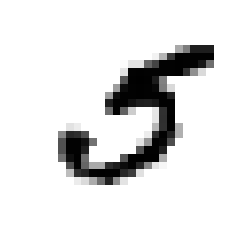

In [7]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

some_digit_image = some_digit.reshape(28,28)

plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation='nearest')
plt.axis('off')
plt.show()

In [8]:
from scipy.ndimage.interpolation import shift
def shift_digit(digit_array, dx, dy, new=0):
    return shift(digit_array.reshape(28, 28), [dy, dx], cval=new).reshape(784)

plot_digit(shift_digit(some_digit, 5, 1, new=100))

ValueError: cannot reshape array of size 1 into shape (28,28)

In [ ]:
# Train Model

from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(n_jobs=-1, weights='distance', n_neighbors=4)
knn_clf.fit(x_train, y_train)

In [ ]:
y_knn_pred = knn_clf.predict(x_test)

In [ ]:
# Test accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_knn_pred)